In [1]:
#%pylab
from halotools.sim_manager import CachedHaloCatalog

In [2]:
halocat = CachedHaloCatalog(simname = 'bolplanck', version_name = 'halotools_v0p4',redshift = 0, \
                            halo_finder = 'rockstar')

In [3]:
halocat.particle_mass

155000000.0

In [19]:
from halotools.utils import randomly_downsample_data

In [20]:
len(randomly_downsample_data(np.concatenate((halocat.ptcl_table['x'].reshape((1000000,1)),\
                halocat.ptcl_table['y'].reshape((1000000,1)),\
                halocat.ptcl_table['z'].reshape((1000000,1))),axis=1),int(1e5)))

100000

In [6]:
halocat.num_ptcl_per_dim

2048

In [17]:
halocat.ptcl_table[:100]

<Table length=100>
     vx      ptcl_id       vy         y         x          vz         z    
  float64     int64     float64    float64   float64    float64    float64 
----------- --------- ----------- --------- --------- ----------- ---------
 -69.001251    123171 -116.380684  4.815109 18.533297  156.330078  0.773676
  25.169729    163981 -297.951721  4.124008  8.704267  147.830536  3.671154
 111.351692    229538  -43.670399  12.52967 11.487307   284.26004  6.024493
 822.688232    274741 -382.515503 14.676214 25.908524  781.574036  7.028404
  105.64019    307230  -23.951712 17.240847  3.508105  195.045731  4.305547
 189.467529    368979 -210.265823 19.457386 25.503664  249.234421  5.125253
  137.21199    401760   75.508415 25.973709 25.565132  192.806519  4.574927
  -52.18539    426455  119.095512 27.158073 29.584492  171.522461  2.787432
 224.791702   1180032   318.19632 12.040633 25.845716  424.921936  4.662459
-334.010284   1311115  -65.279816 14.310475 26.731424  536.811096   6.79858
        ...       ...         ...       ...       ...         ...       ...
 273.501099  52678888  -19.698936 15.109102 17.870346  425.691833  9.602031
-114.203865  52748730  548.379639 14.527742 26.700439 -366.150299  6.183718
 169.119354  52797550  117.282211 24.157194 10.114667  542.751587 11.069424
 324.432281 809517065  163.016296  0.073739  5.696225 -593.188354  21.81908
  -4.141238  53604506 -541.214478  0.134335  8.656126  -87.386612  8.682343
 207.934143  53772765 -390.040405 14.942529 26.136023   283.43573  6.311259
 209.554352  53793059 -413.359009 12.867436 22.054981 -537.672058 10.809312
 -30.300123  53850406   -28.51523  22.17206 17.972347  364.485291 10.197176
 -86.597832  53854478   52.014072 24.020206 15.035227  422.602386 10.318867
 183.580185  54604197  604.856079 11.988256 25.501802  240.816879  4.521165

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [5]:
from HOD_models import decorated_hod_model

In [9]:
from halotools.mock_observables import return_xyz_formatted_array

In [6]:
model = decorated_hod_model()

In [7]:
model.populate_mock(halocat)

In [23]:
gal_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=halocat.Lbox)

In [24]:
gal_u = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), period=halocat.Lbox)

In [25]:
ptcl_d = return_xyz_formatted_array(*(halocat.ptcl_table[ax] for ax in 'xyz'), \
            velocity=halocat.ptcl_table['vz'], velocity_distortion_dimension='z',\
                                          period=halocat.Lbox)

In [26]:
ptcl_u = return_xyz_formatted_array(*(halocat.ptcl_table[ax] for ax in 'xyz'), period=halocat.Lbox)

In [17]:
from fast3tree import fast3tree

In [29]:
def pos_visual(particles_pos, halos_pos, r=3.5, box_size=250):
    with fast3tree(particles_pos) as tree:
        tree.set_boundaries(0, box_size)
        for halo_pos in halos_pos:
            pos = tree.query_radius(halo_pos, r, True, 'pos')
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            xs = pos[:,0]
            ys = pos[:,1]
            zs = pos[:,2]
            ax.scatter(xs, ys, zs)
            ax.plot([halo_pos[0],],[halo_pos[1],],[halo_pos[2],],'ro')

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
    return 0

<IPython.core.display.Javascript object>


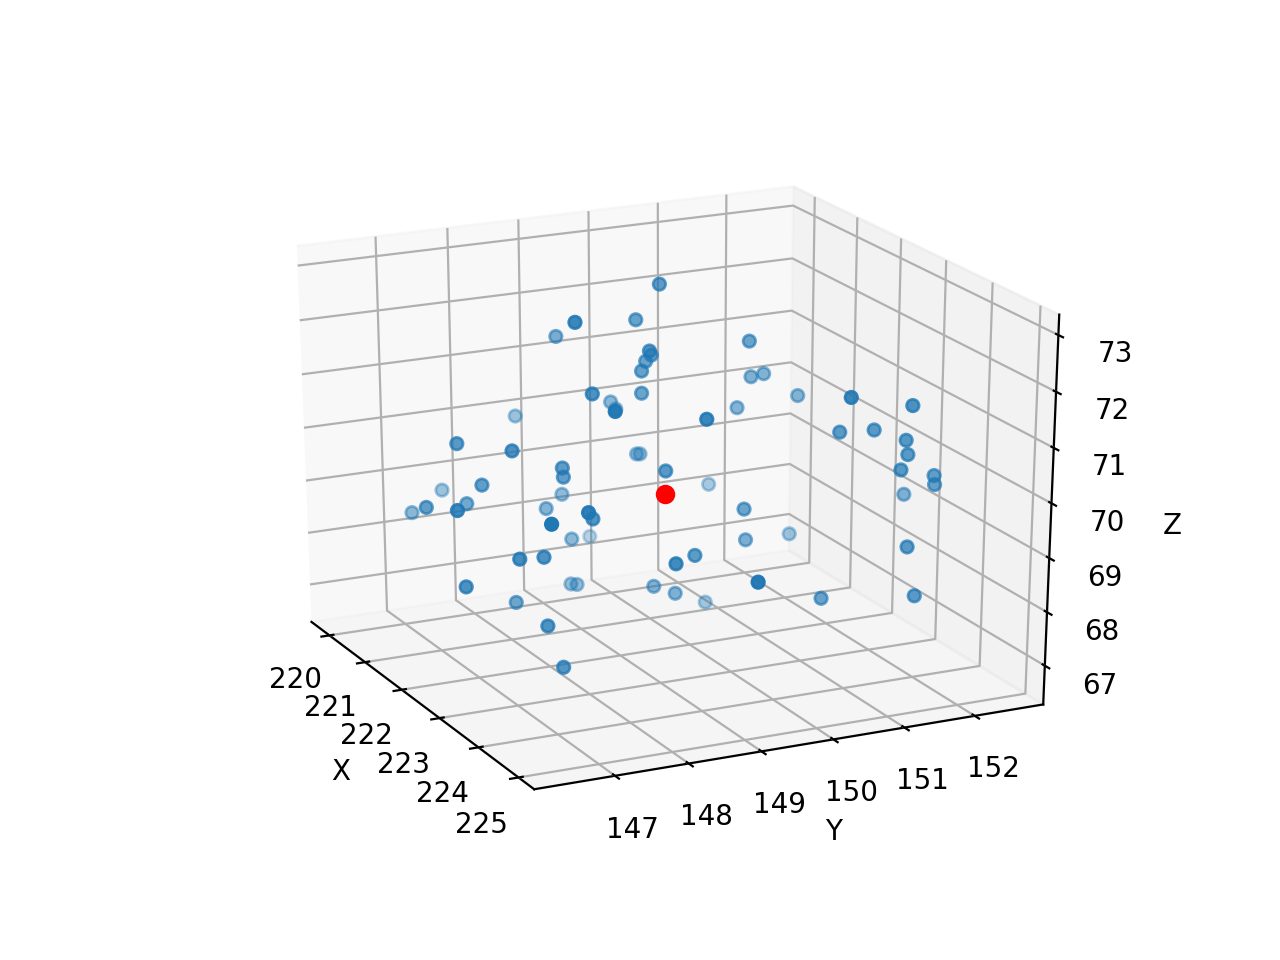

<IPython.core.display.Javascript object>


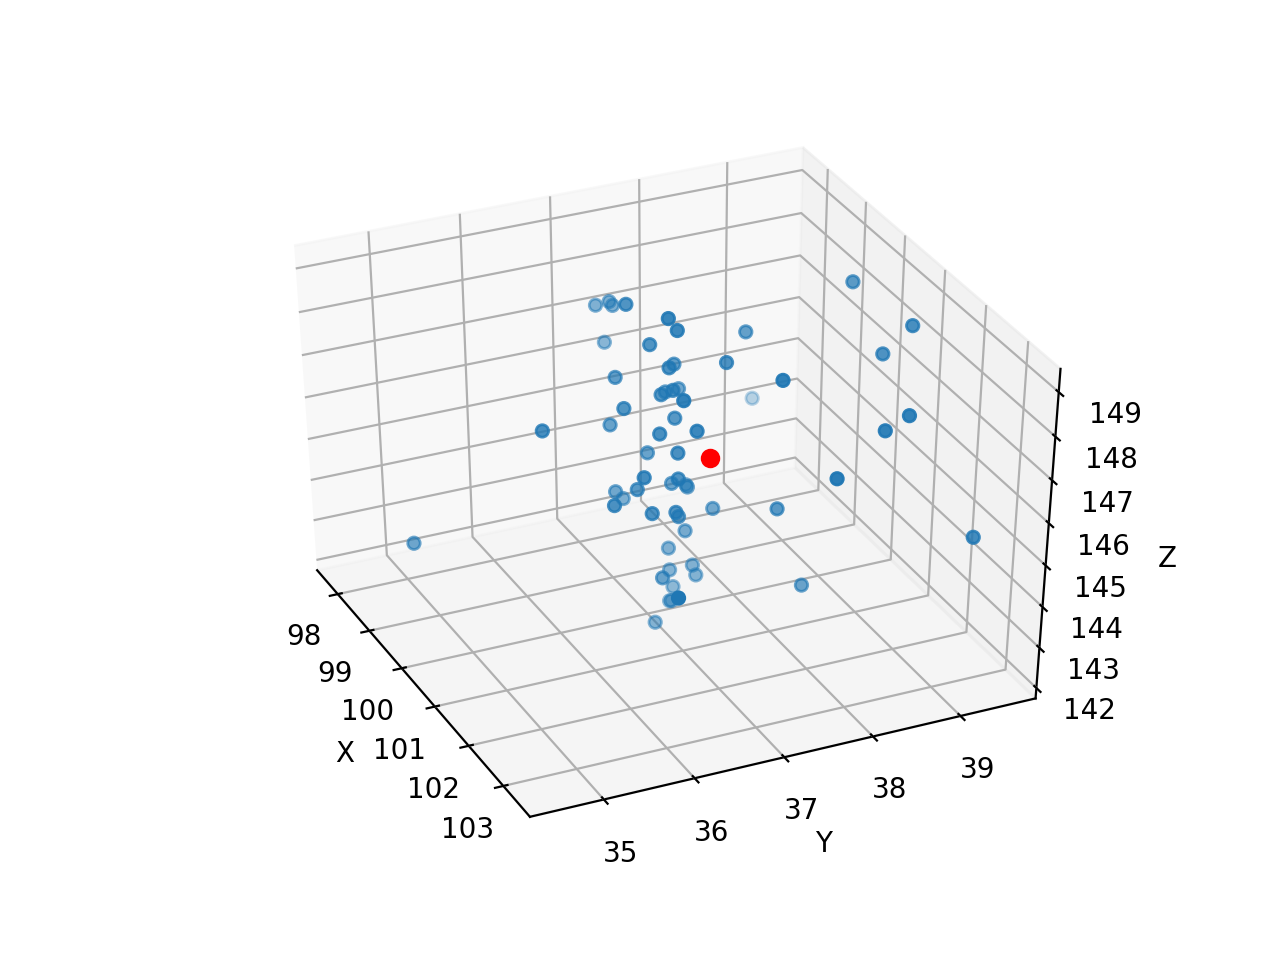

<IPython.core.display.Javascript object>


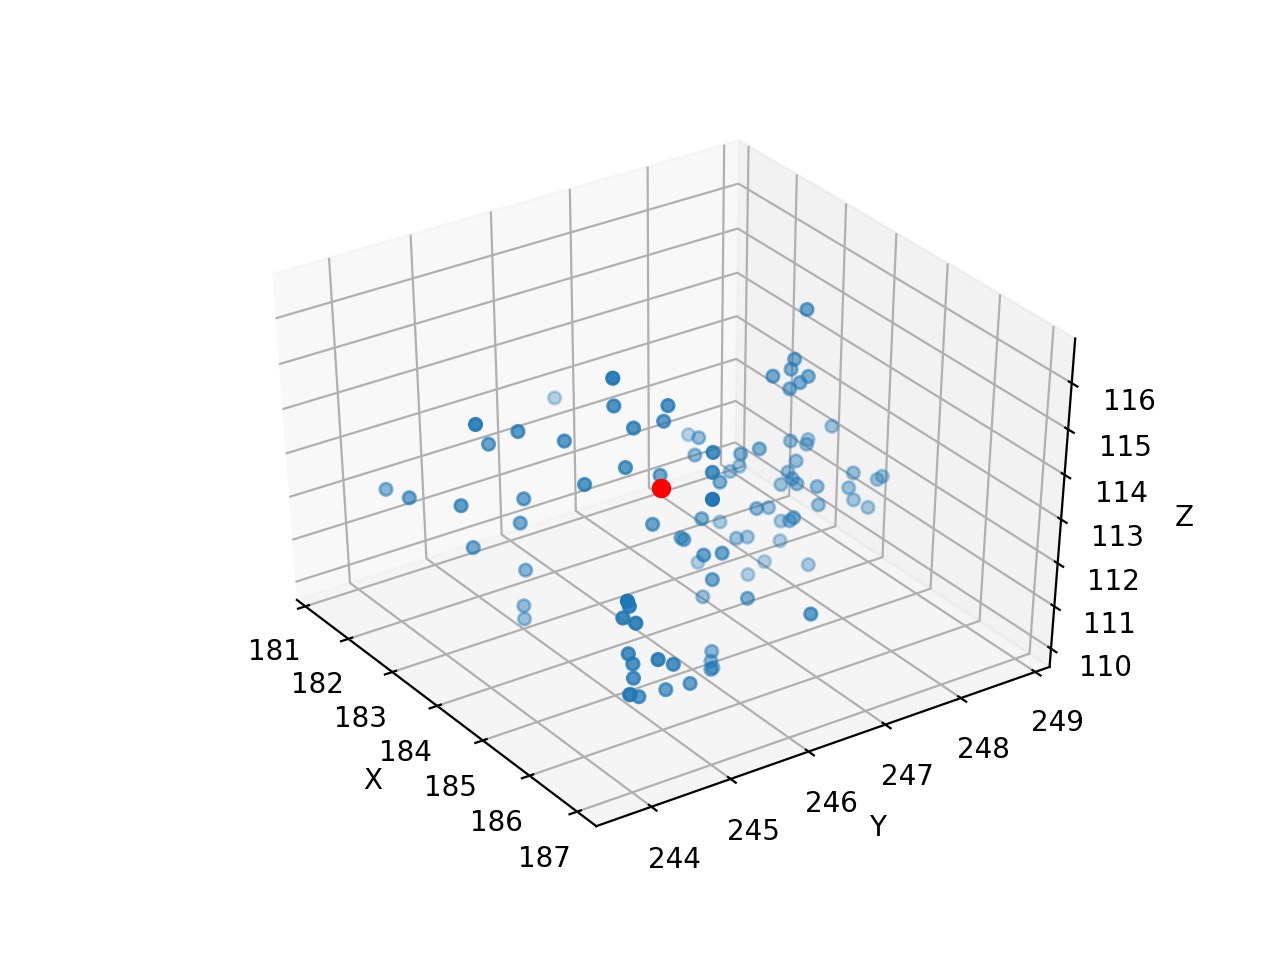

<IPython.core.display.Javascript object>


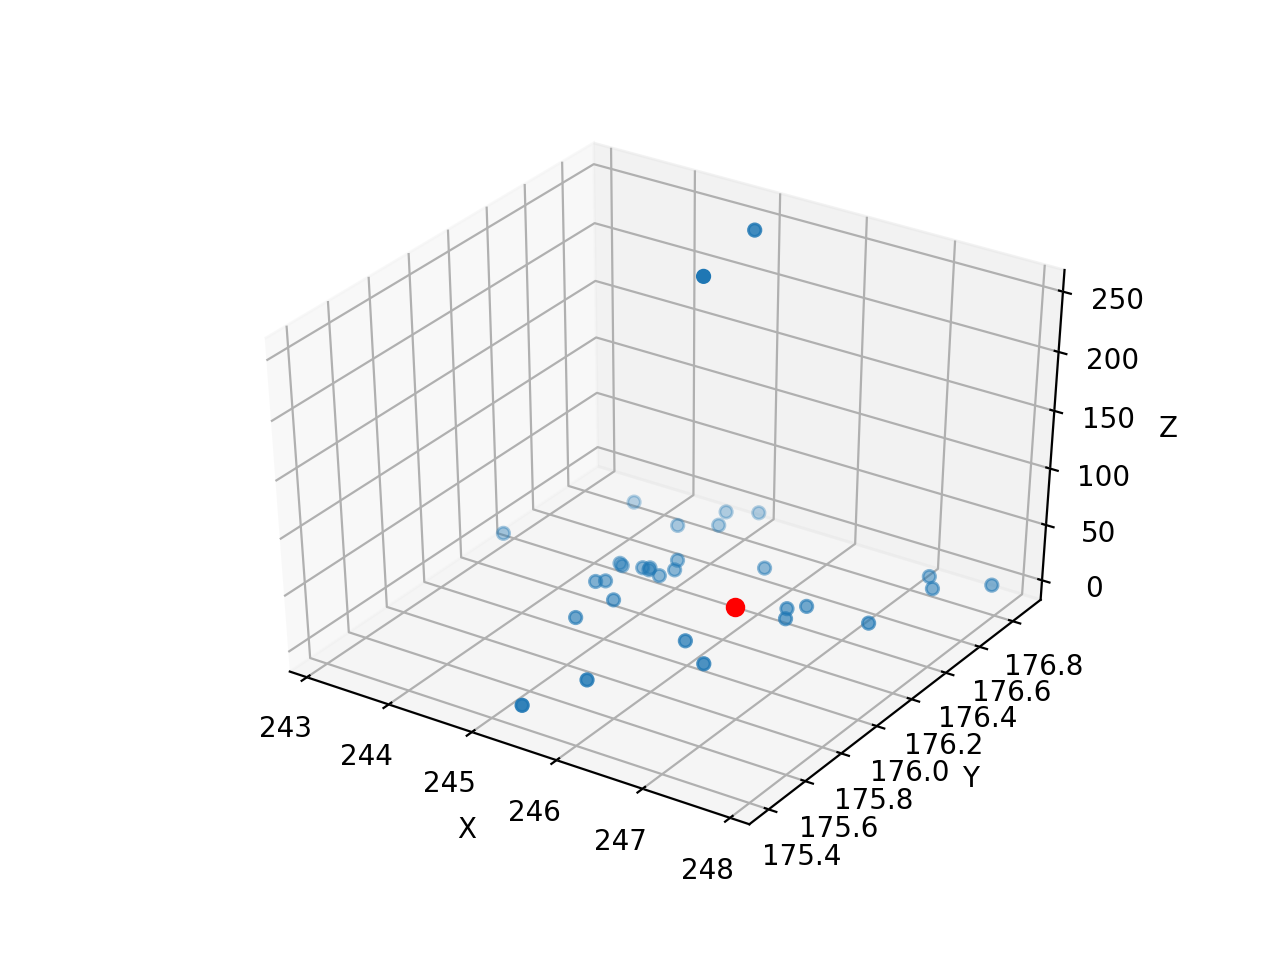

<IPython.core.display.Javascript object>


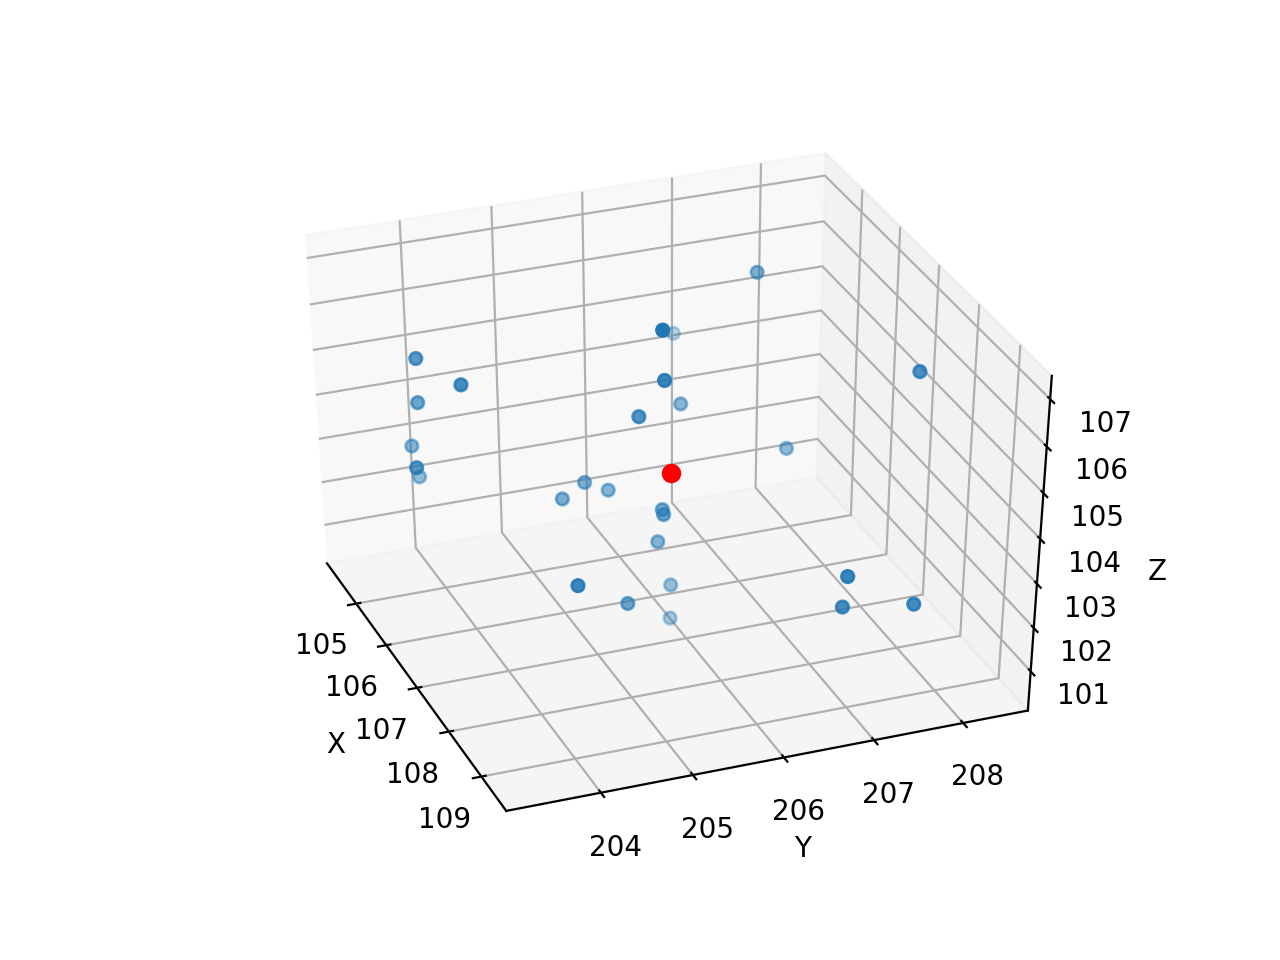

<IPython.core.display.Javascript object>


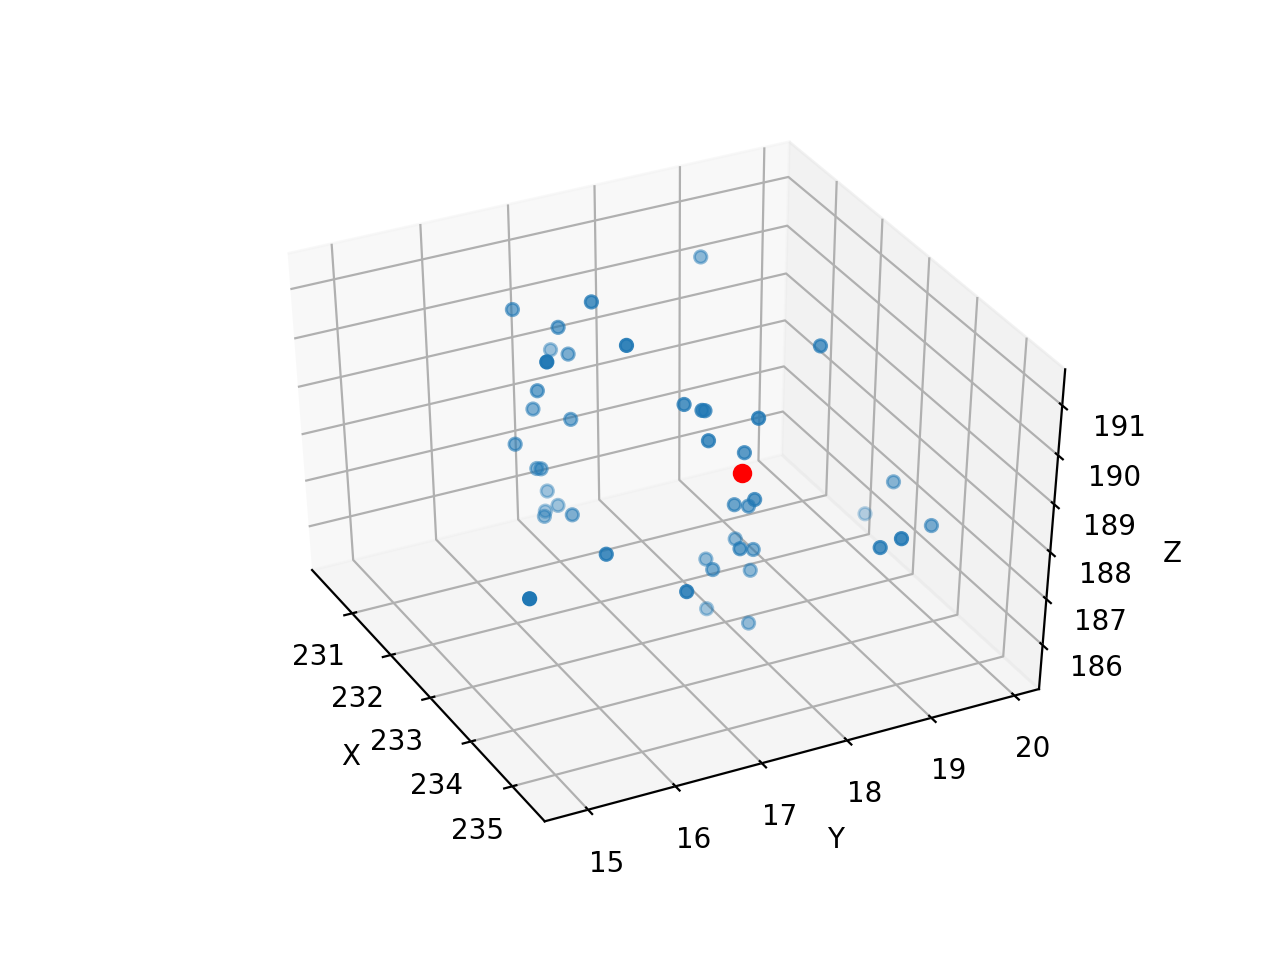

<IPython.core.display.Javascript object>


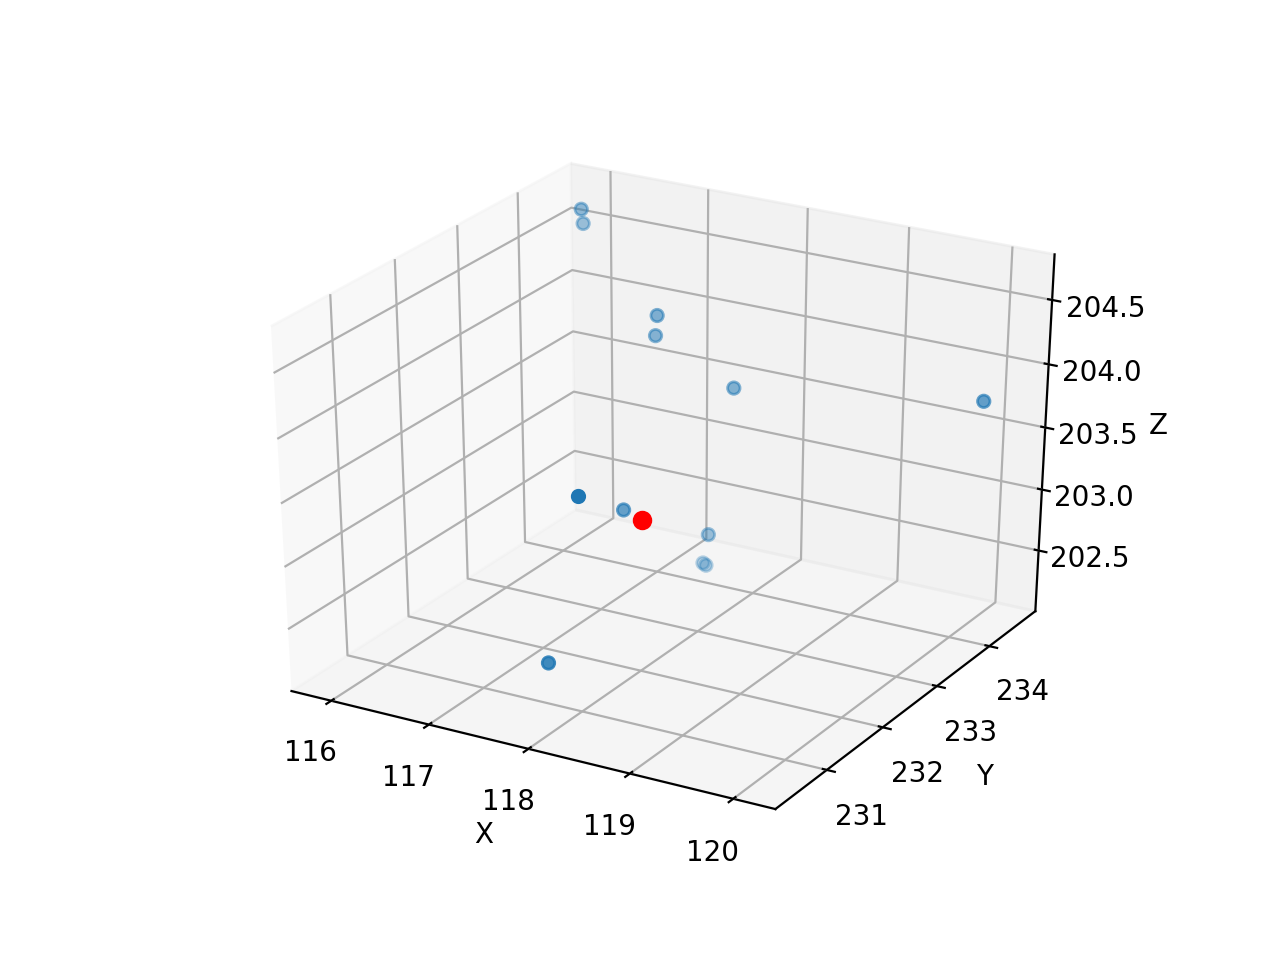

<IPython.core.display.Javascript object>


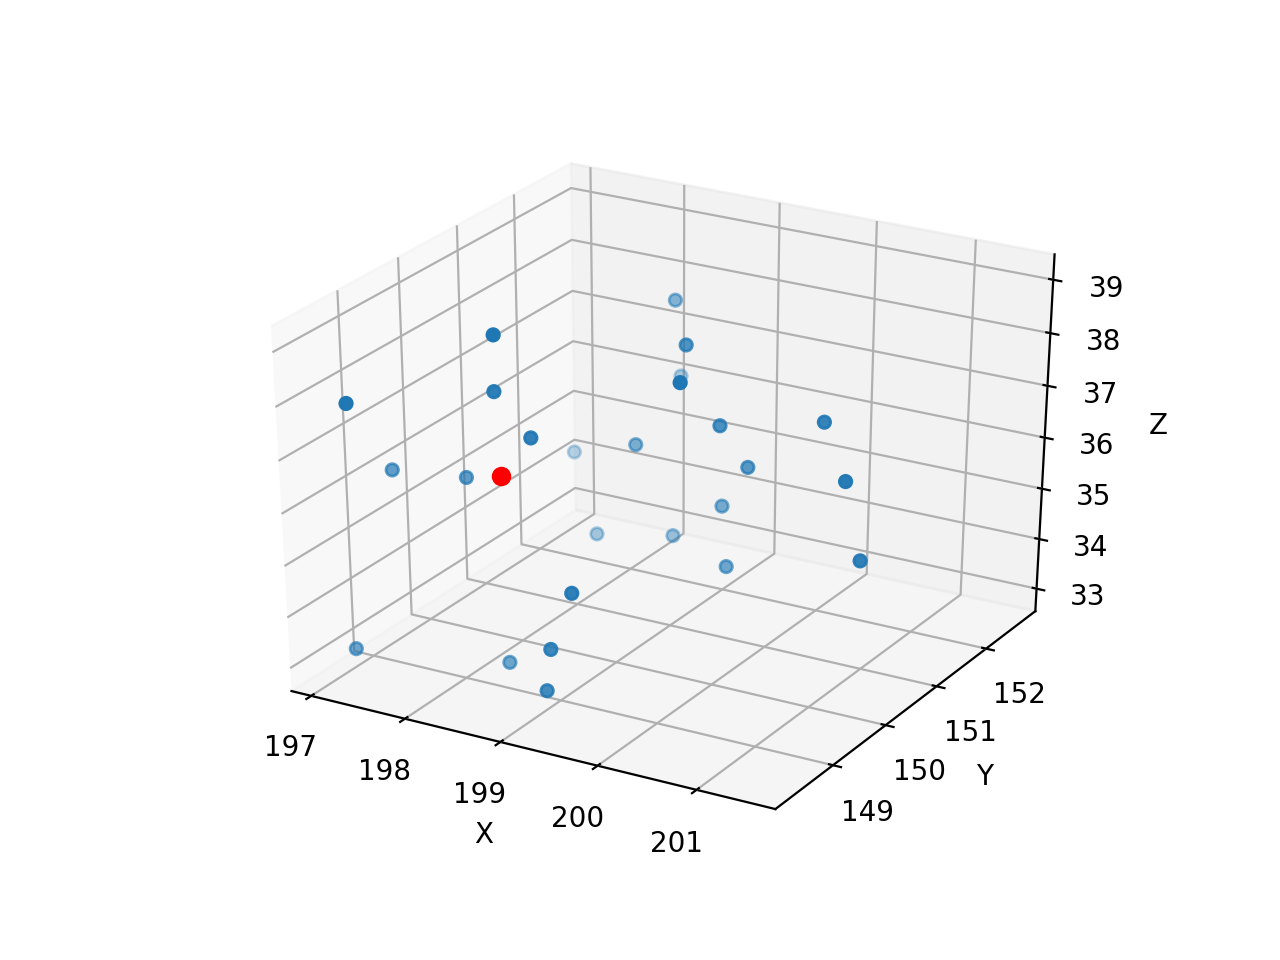

<IPython.core.display.Javascript object>


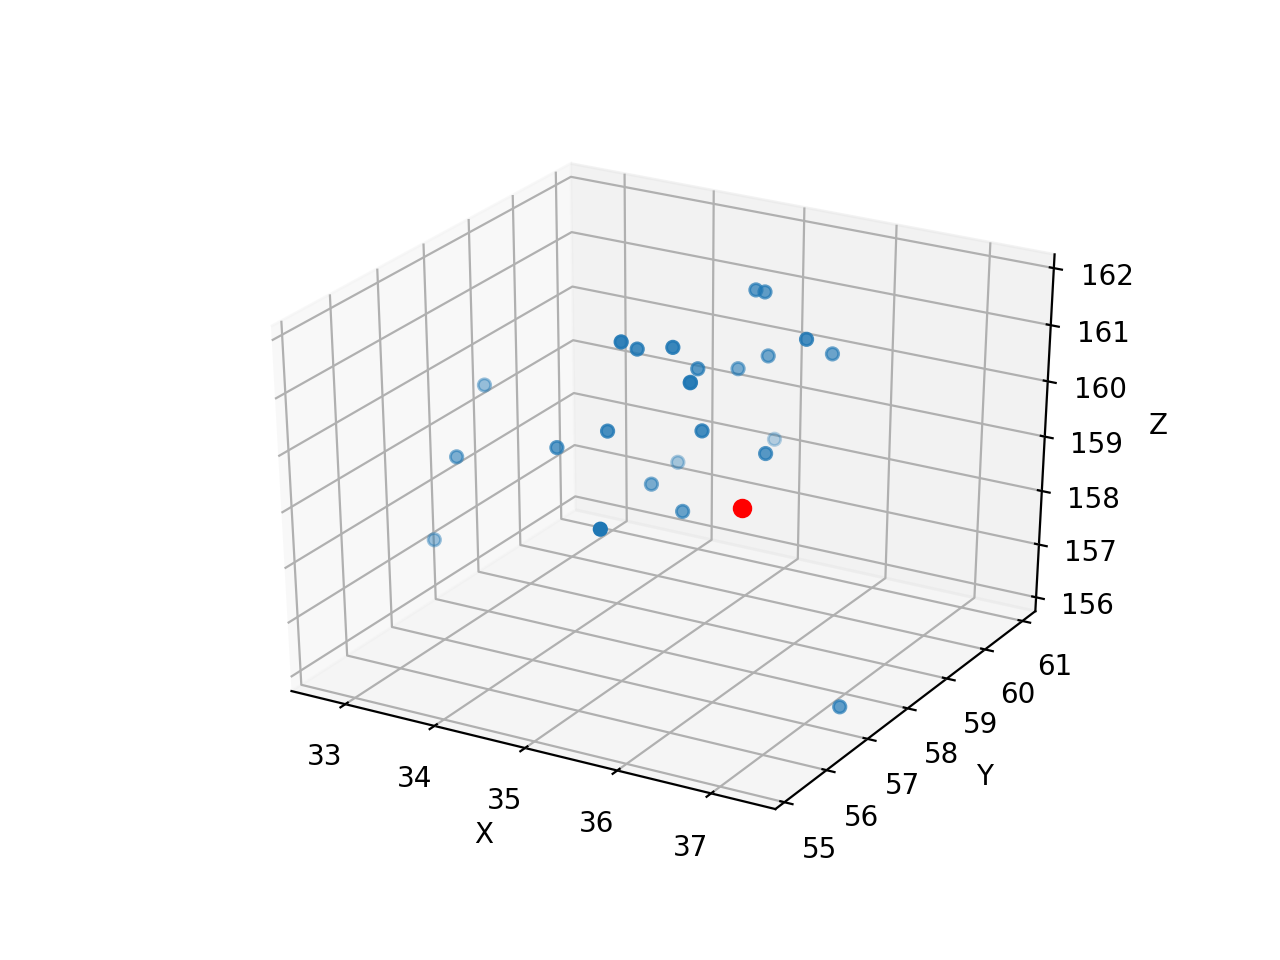

<IPython.core.display.Javascript object>


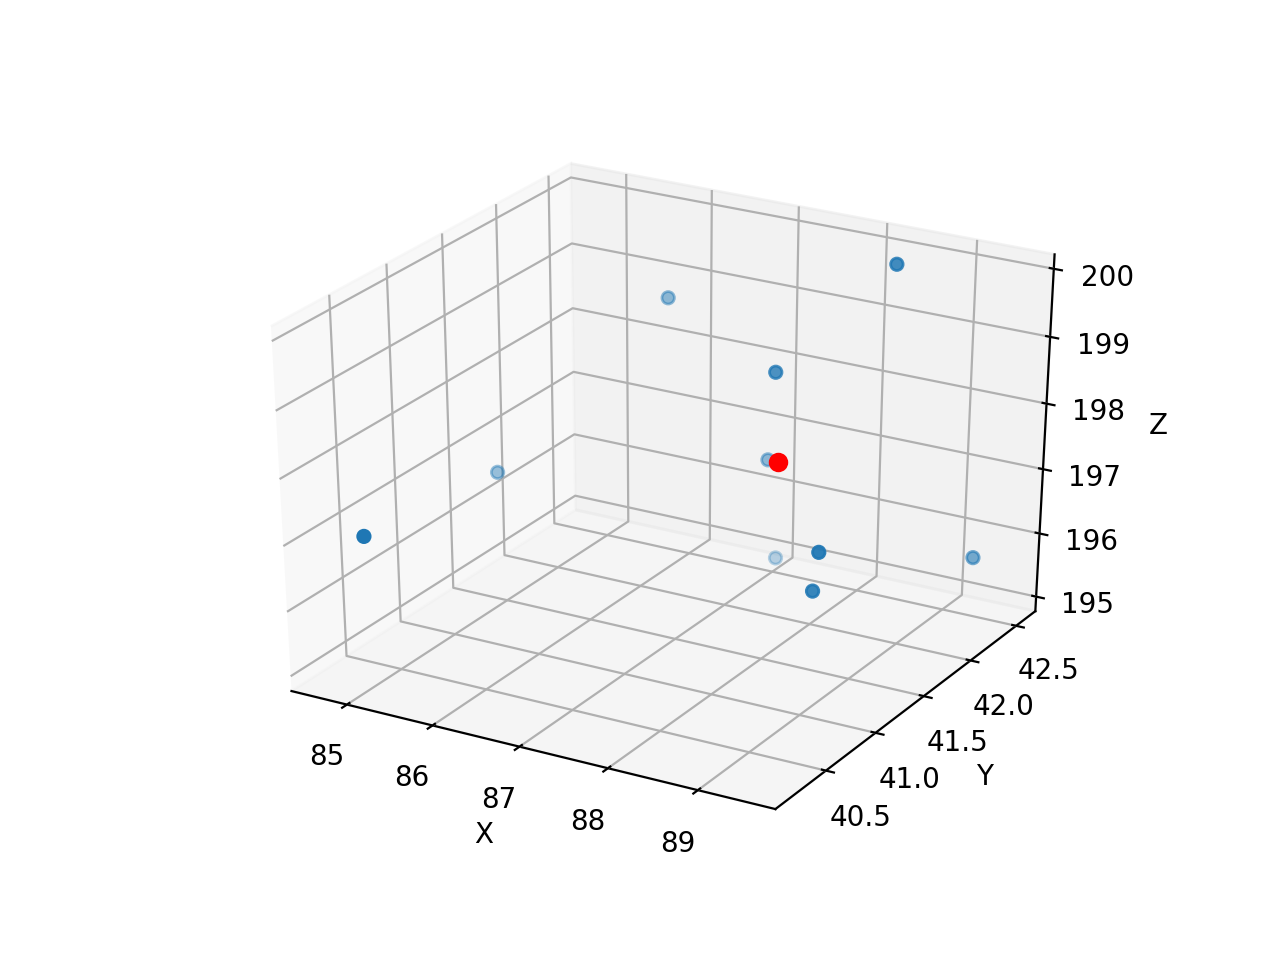

0

In [30]:
pos_visual(ptcl_d, randomly_downsample_data(gal_d,10))

<IPython.core.display.Javascript object>


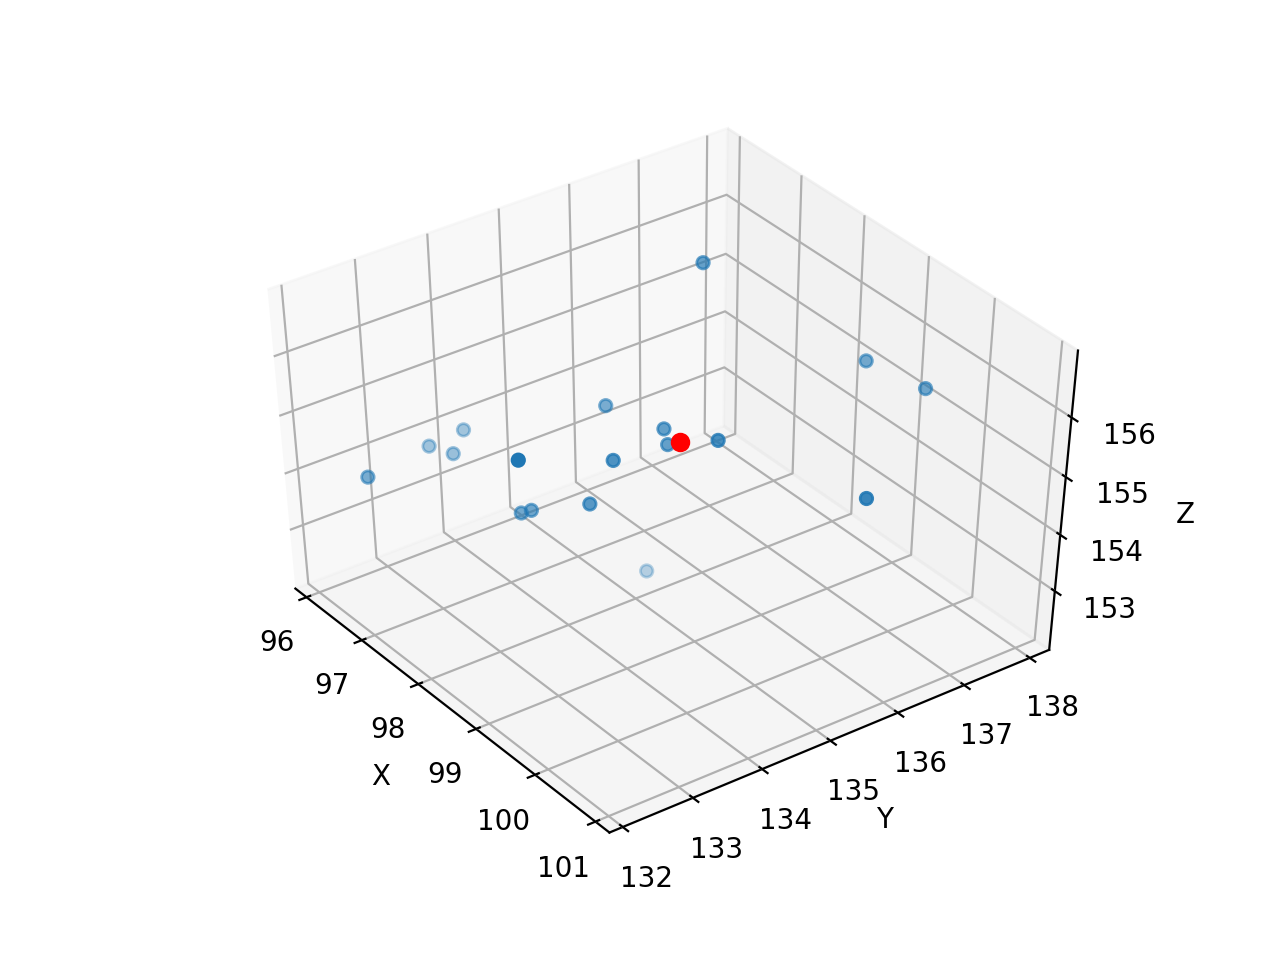

<IPython.core.display.Javascript object>


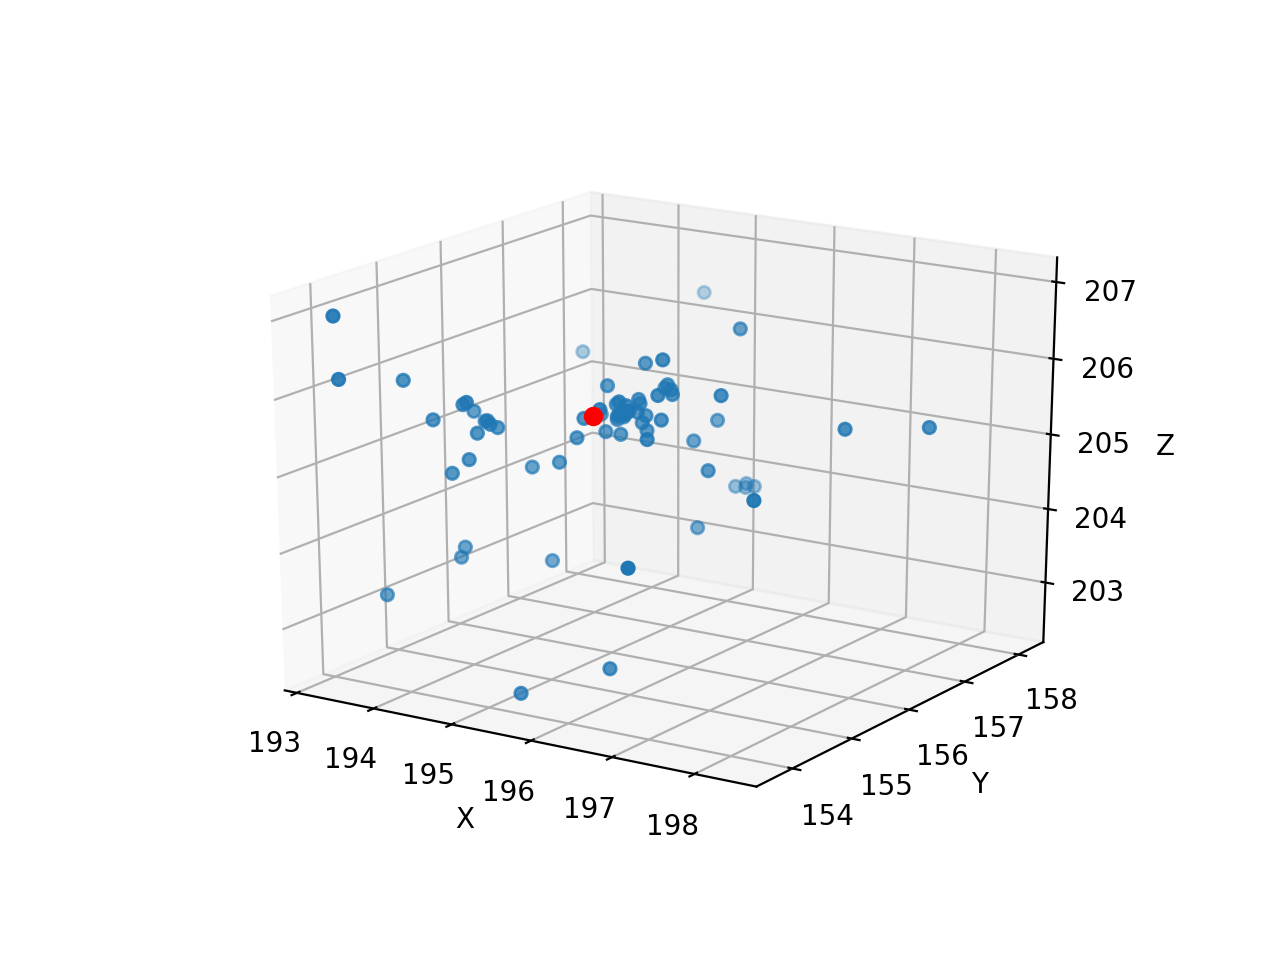

<IPython.core.display.Javascript object>


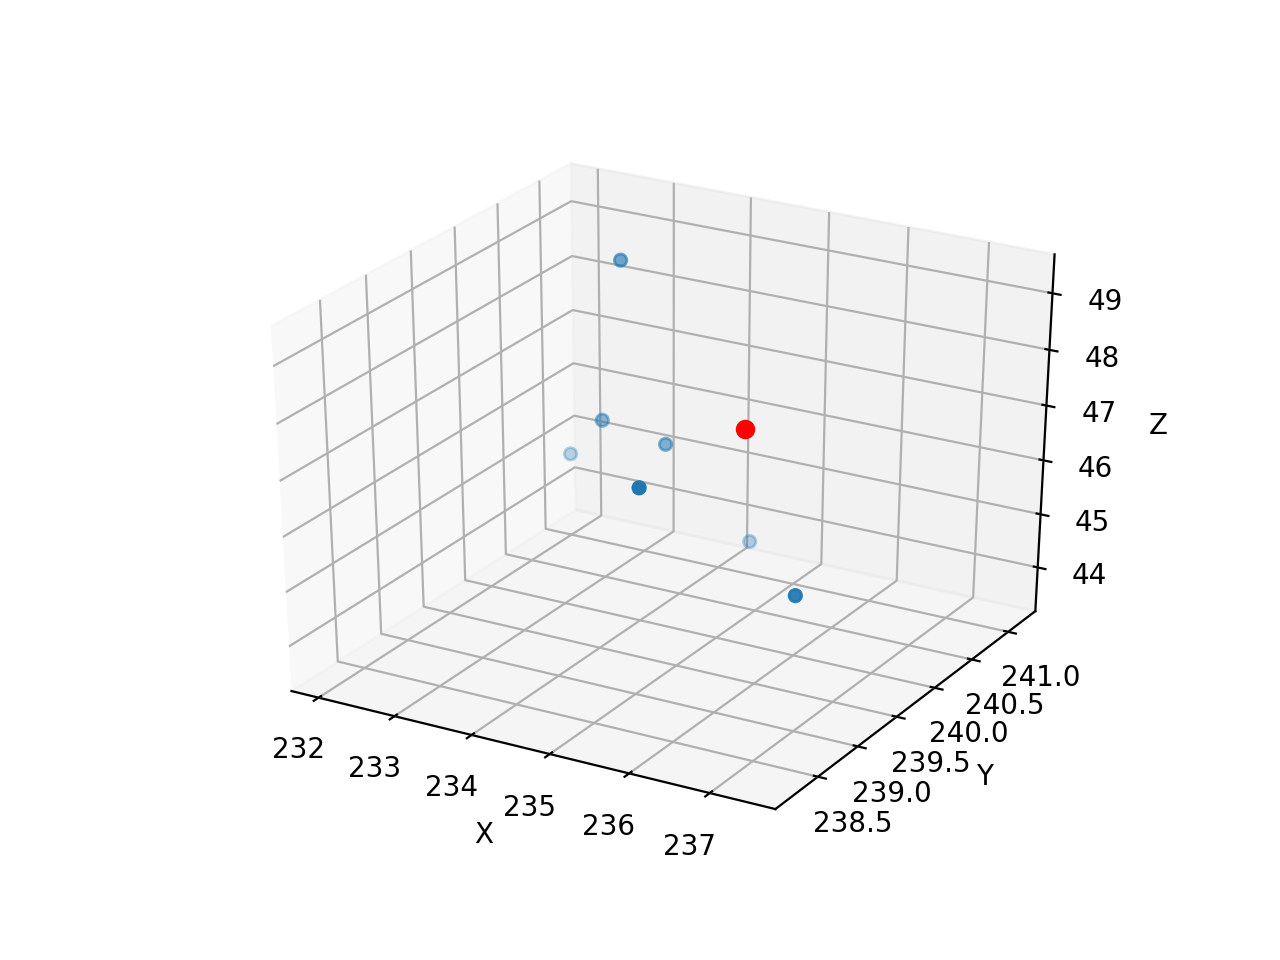

<IPython.core.display.Javascript object>


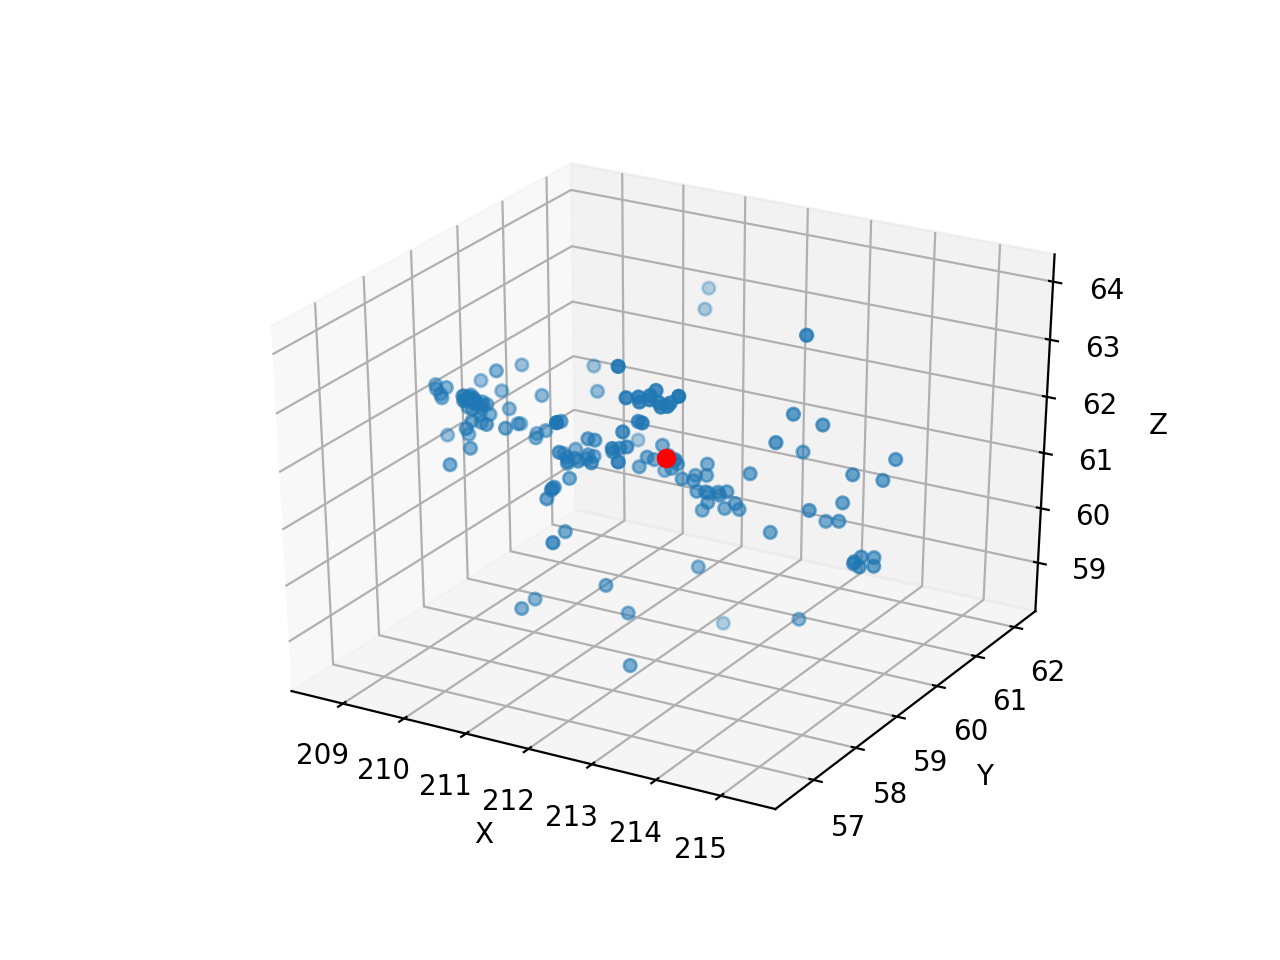

<IPython.core.display.Javascript object>


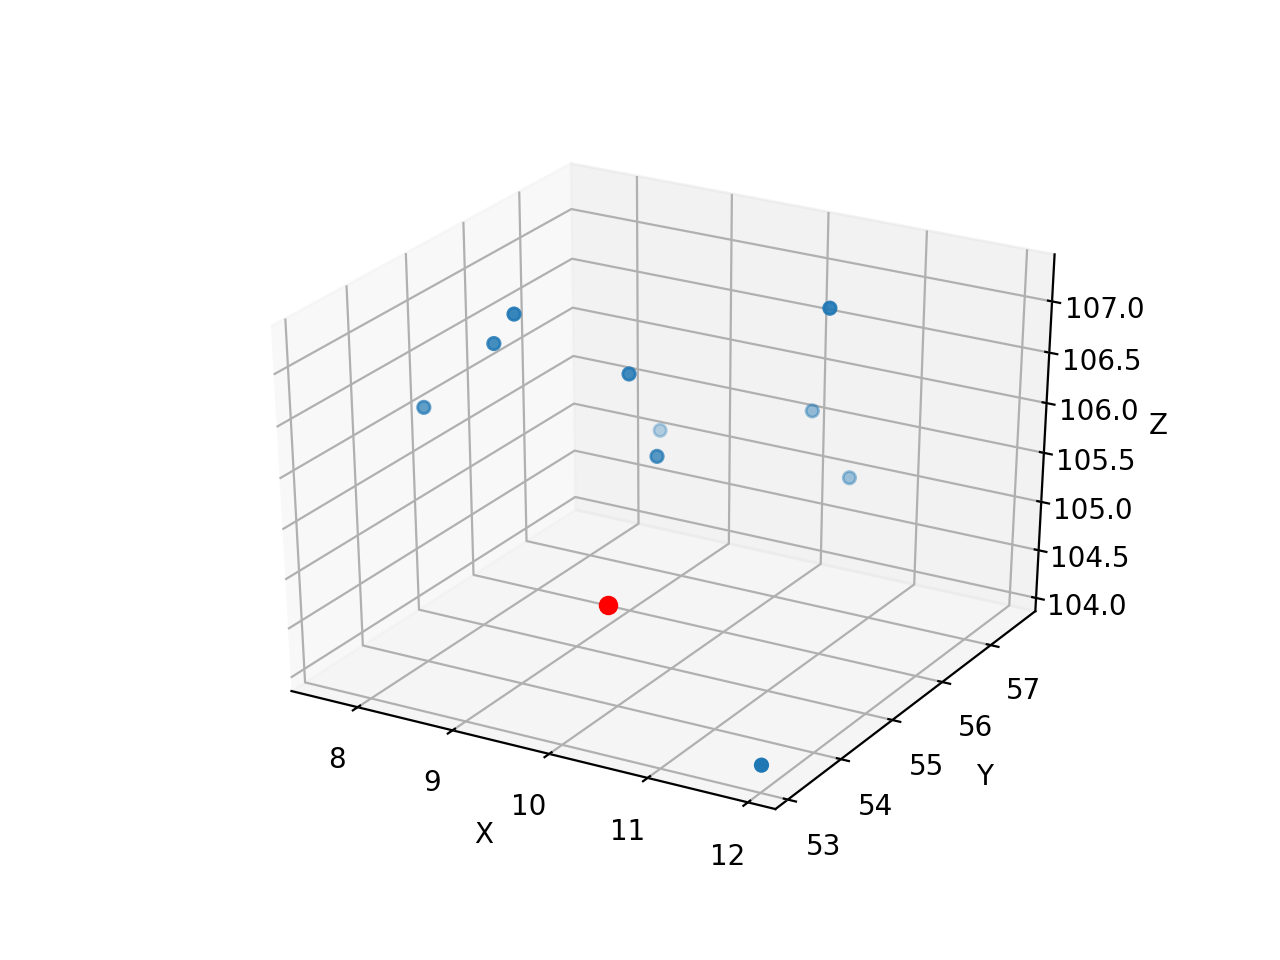

<IPython.core.display.Javascript object>


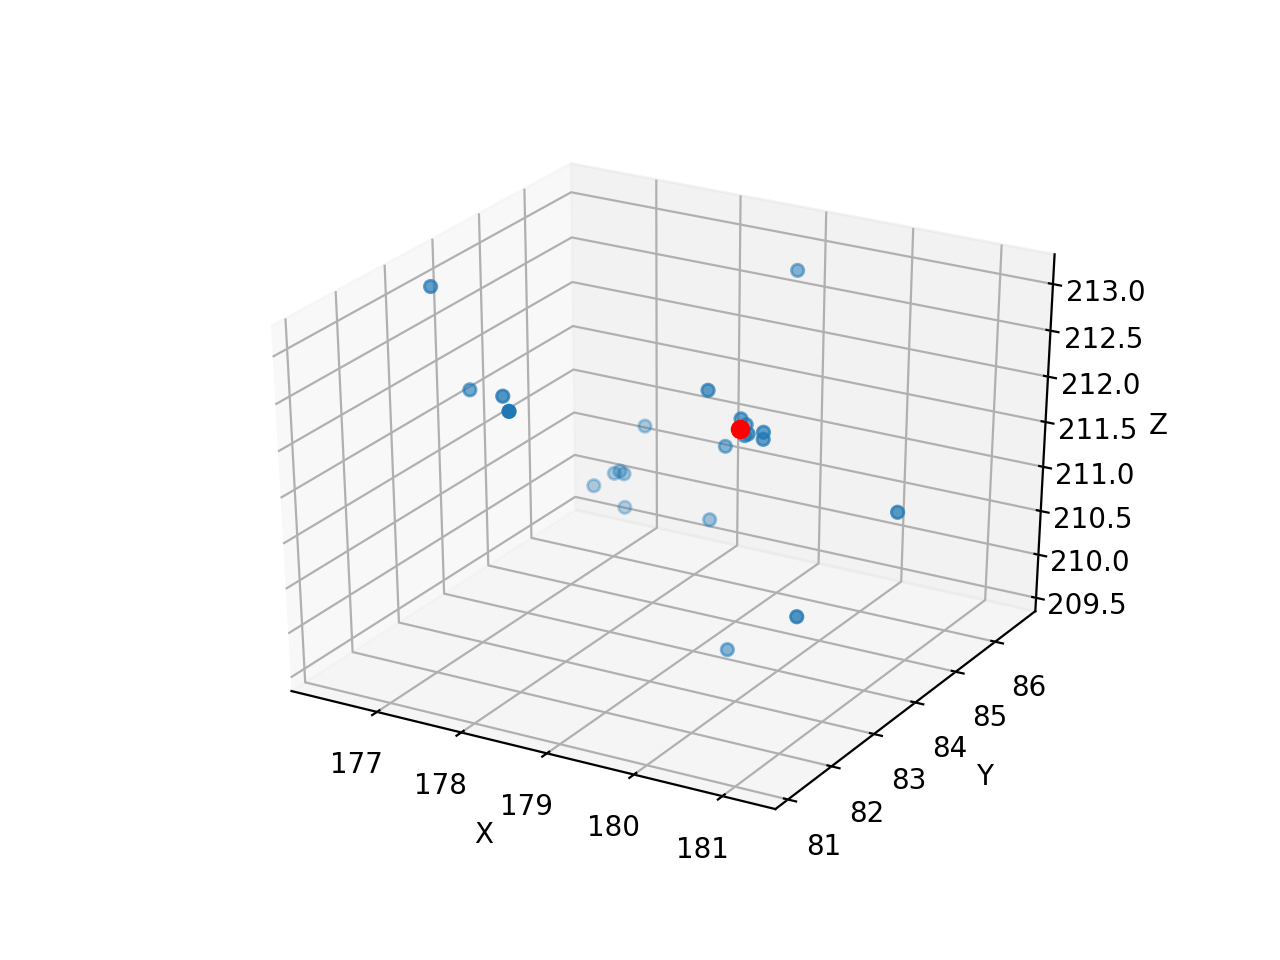

<IPython.core.display.Javascript object>


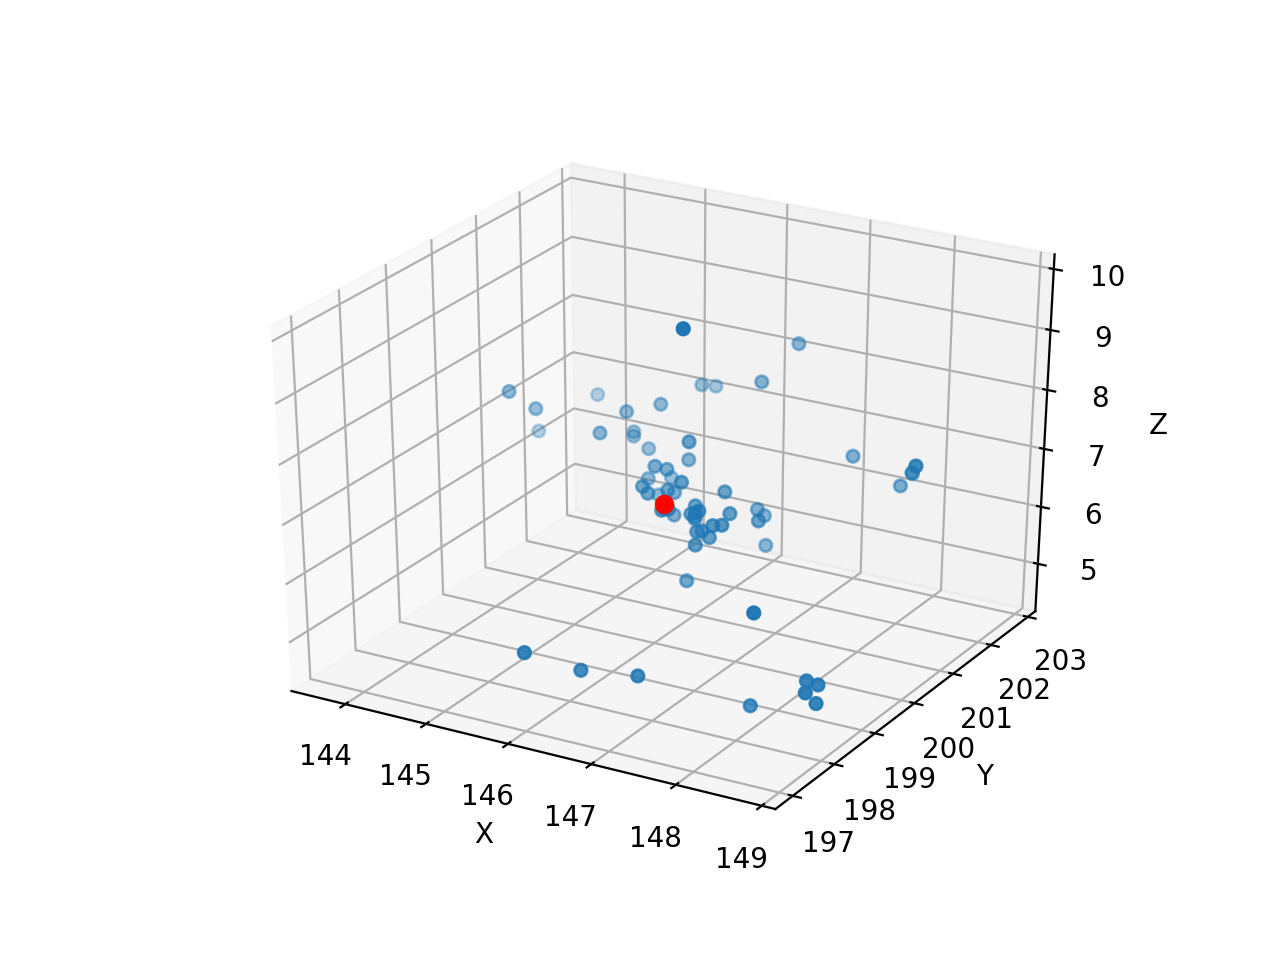

<IPython.core.display.Javascript object>


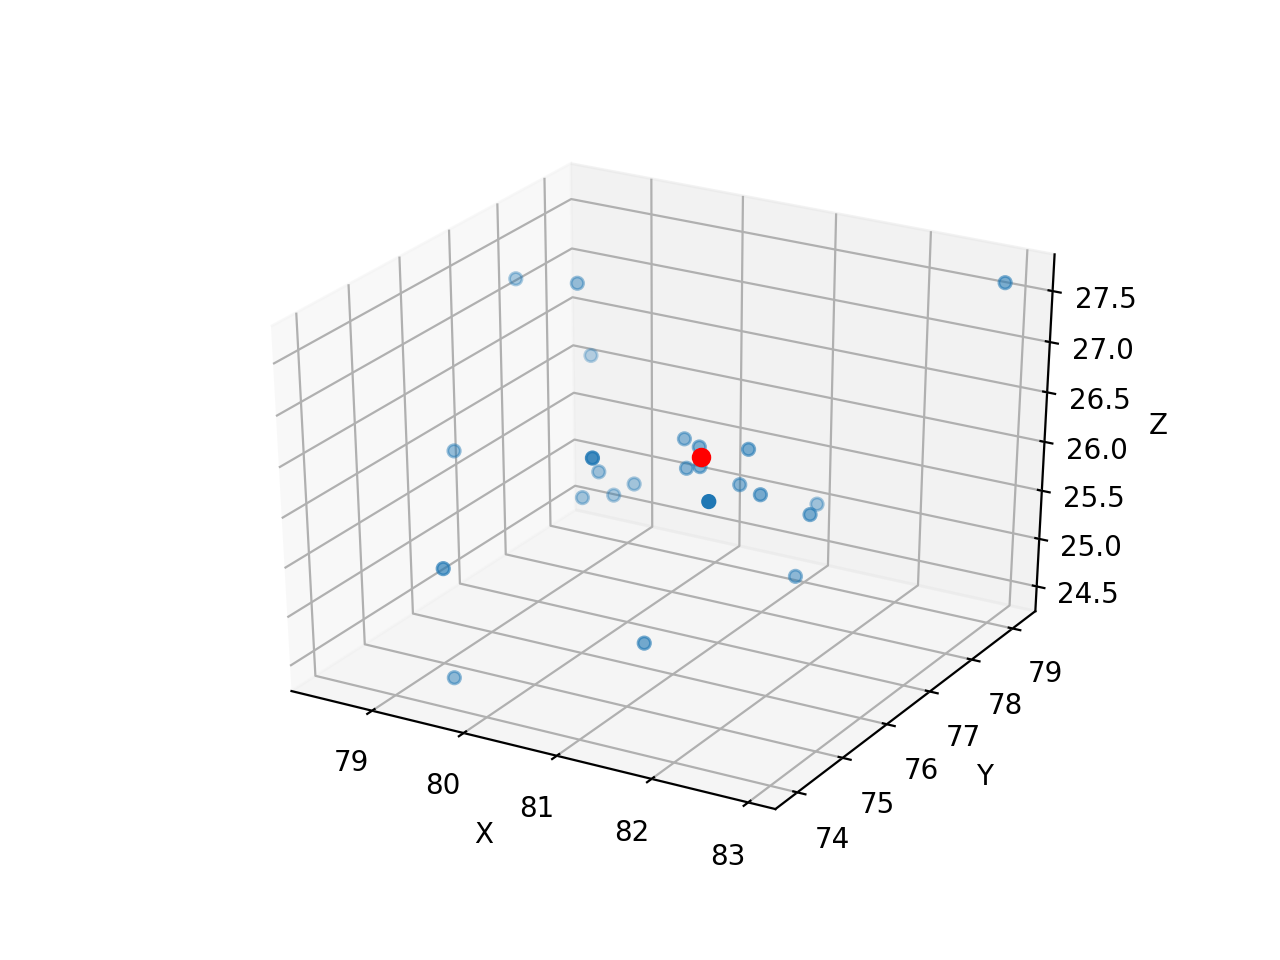

<IPython.core.display.Javascript object>


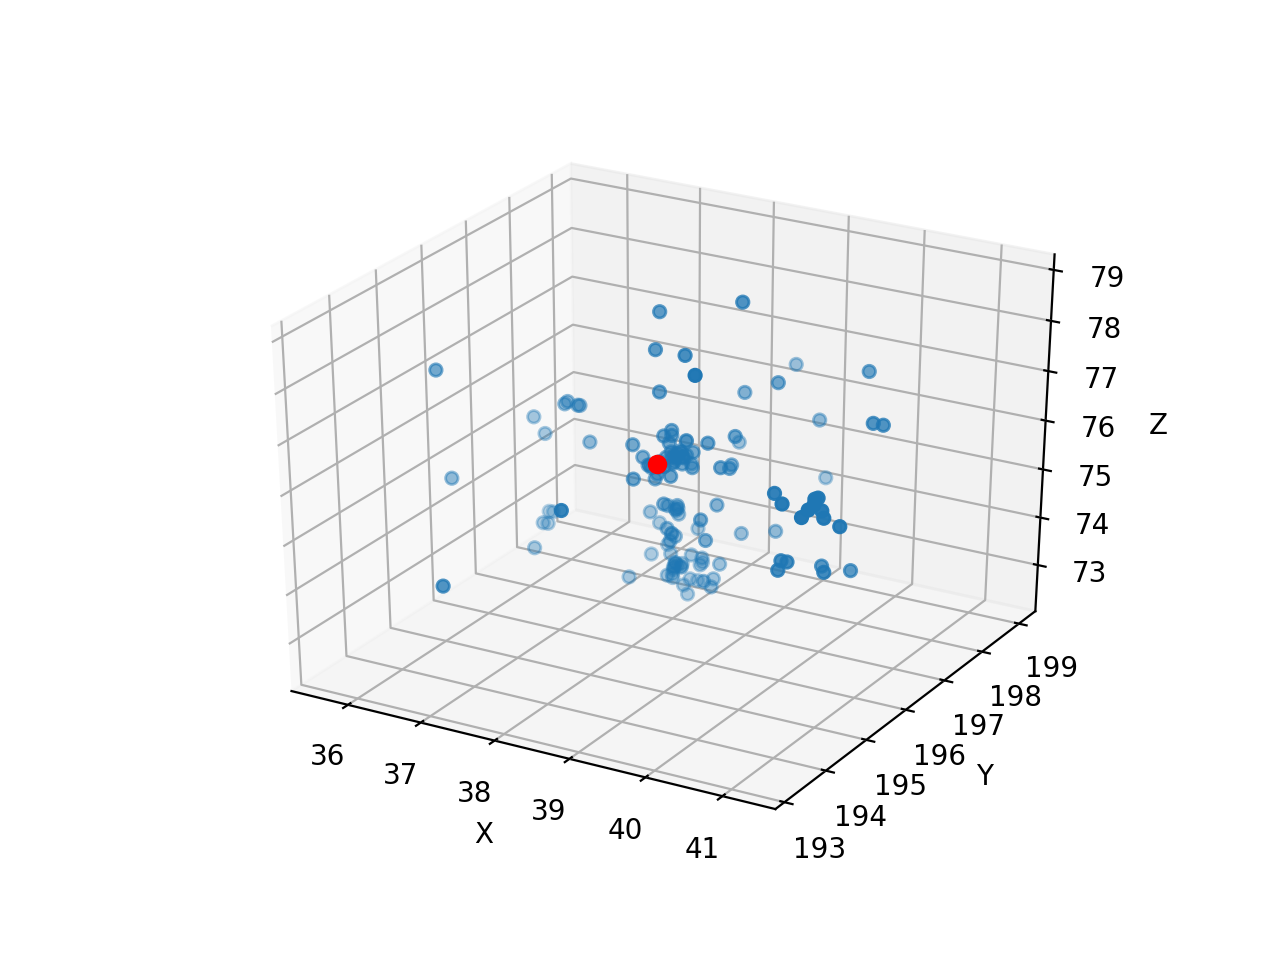

<IPython.core.display.Javascript object>


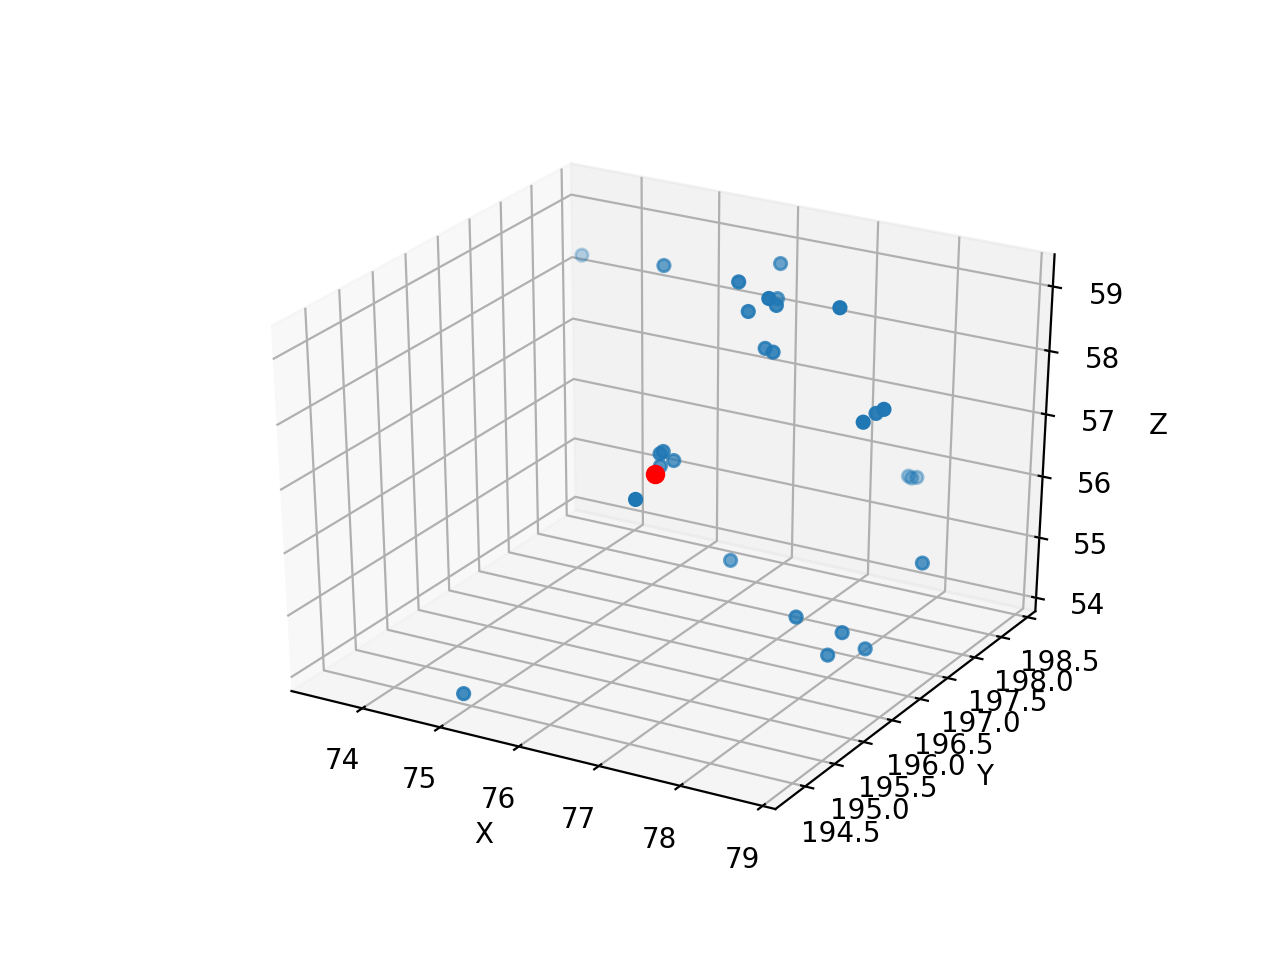

0

In [31]:
pos_visual(ptcl_u, randomly_downsample_data(gal_u,10))